### Importación de datos



In [65]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [22]:
#Ingresos Totales por tienda

nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
tiendas = [tienda, tienda2, tienda3, tienda4]
ingresos = lambda x: int(sum(x['Precio']))

ingresos_por_tienda = pd.DataFrame({'Nombre': nombres , 'Ingresos': map(ingresos,tiendas)})

ingresos_por_tienda



,Nombre,Ingresos
0,Tienda 1,1150880400
1,Tienda 2,1116343500
2,Tienda 3,1098019600
3,Tienda 4,1038375700


# 2. Ventas por categoría

In [38]:
#Cantidad de productos vendidos por categoria en cada tienda

cantidad_prod = lambda x: x.groupby('Categoría del Producto')['Producto'].count()

categorias = pd.concat(map(cantidad_prod,tiendas), axis=1)
categorias.columns = nombres
categorias



,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


# 3. Calificación promedio de la tienda


In [53]:
#Calificaciones promedio de los clientes para cada tienda

calificacion = pd.concat(map(lambda x: pd.Series(x["Calificación"].mean()),tiendas), axis=1)

calificacion.columns = nombres
calificacion.index = ['Calificación']
calificacion




,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Calificación,3.976685,4.037304,4.048326,3.995759


# 4. Productos más y menos vendidos

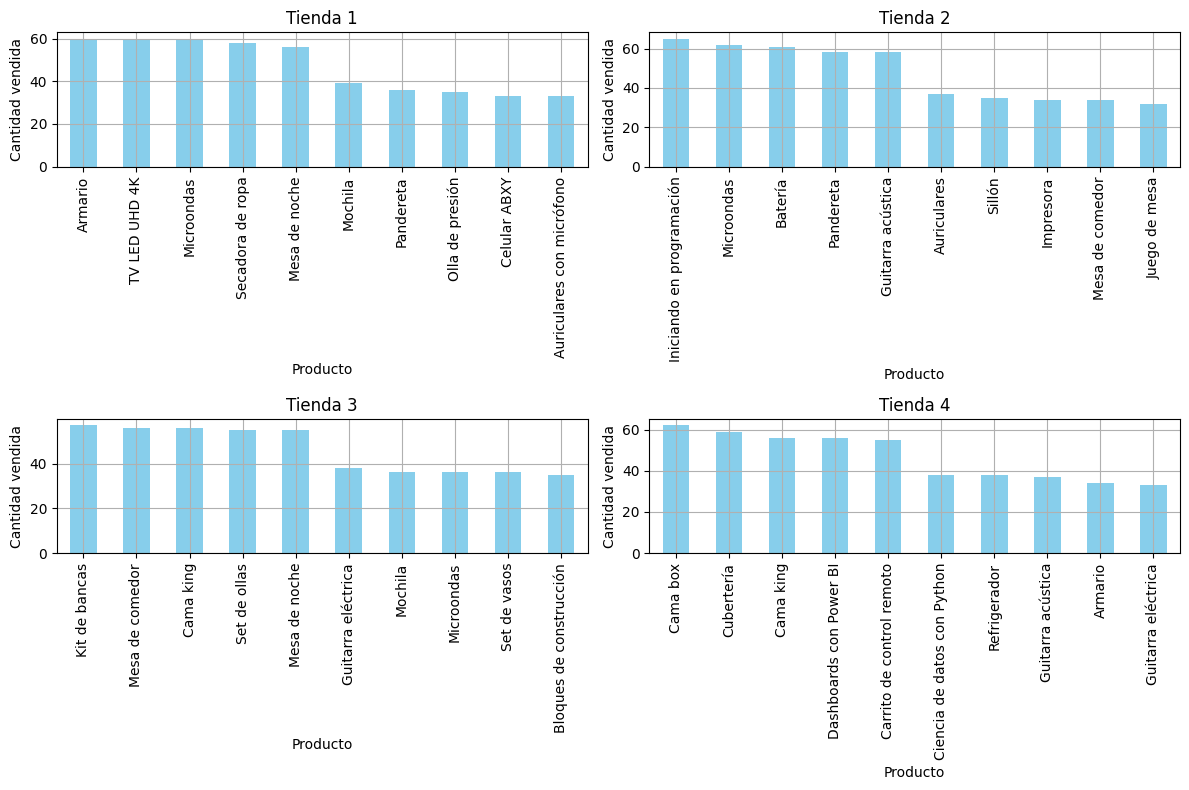

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, (nombre, tienda) in enumerate(zip(nombres, tiendas)):
    producto = tienda.groupby('Producto')['Producto'].count().sort_values(ascending=False)
    valores = pd.concat([producto.head(5), producto.tail(5)])
    valores.plot(kind='bar', color='skyblue', ax=axes[i])
    axes[i].set_title(f"{nombre}")
    axes[i].set_xlabel("Producto")
    axes[i].set_ylabel("Cantidad vendida")
    axes[i].grid(True)

plt.tight_layout()
plt.show()






# 5. Envío promedio por tienda

In [72]:
#costo de envío promedio para cada tienda

costo_envio = pd.concat(map(lambda x: pd.Series(x["Costo de envío"].mean()),tiendas), axis=1)

costo_envio.columns = nombres
costo_envio.index = ['Costo de envío']
costo_envio

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Costo de envío,26018.60958,25216.235693,24805.680373,23459.457167


# **INFORME**

El presente análisis tiene como objetivo identificar cuál de las tiendas ofrece mejores condiciones para que el Sr. Juan venda sus productos.
Para ello se analizaron diferentes factores, como ingresos totales, productos y categorías más vendidas, calificaciones promedio de los clientes y costo de envío promedio.
Con base en estos datos y las visualizaciones generadas, se elaboró un informe comparativo que permite determinar la tienda más conveniente

##Ingresos totales



In [76]:
ingresos_por_tienda.sort_values(by='Ingresos', ascending=False)

,Nombre,Ingresos
0,Tienda 1,1150880400
1,Tienda 2,1116343500
2,Tienda 3,1098019600
3,Tienda 4,1038375700


Al analizar los ingresos totales de las cuatro tiendas, se observa que la **Tienda 1** presenta el mayor nivel de ingresos, alcanzando aproximadamente 1,150 millones de pesos.
Le siguen las tiendas 2 y 3 con valores cercanos, mientras que la **Tienda 4** se ubica con el menor ingreso total.
Aunque las diferencias no son muy grandes, **Tienda 1** destaca por generar el mayor volumen de ventas, lo que refleja un mejor rendimiento económico general

##Categorías más y menos vendidas

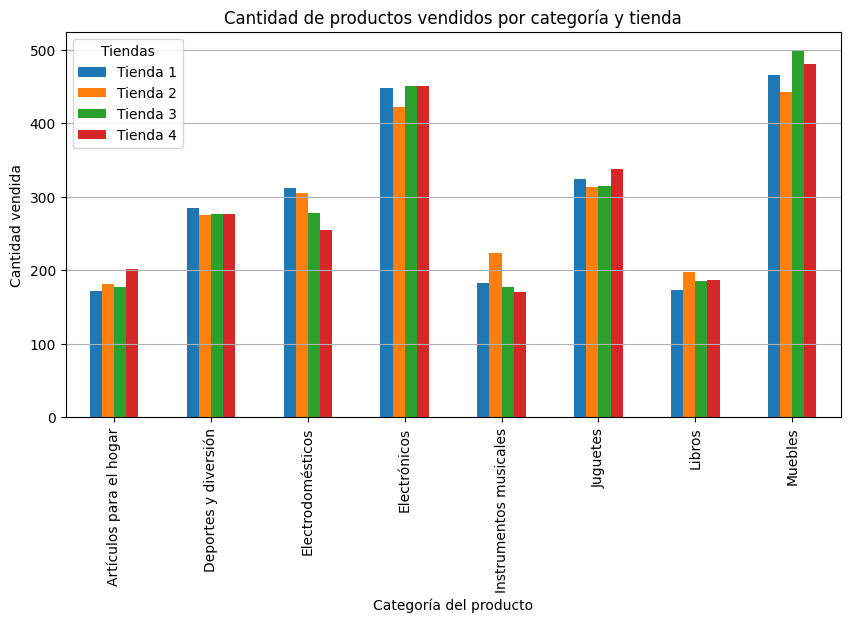

In [77]:
categorias.plot(kind='bar', figsize=(10,5))
plt.title("Cantidad de productos vendidos por categoría y tienda")
plt.xlabel("Categoría del producto")
plt.ylabel("Cantidad vendida")
plt.legend(title="Tiendas")
plt.grid(True, axis='y')
plt.show()

El análisis por categorías muestra que los productos de **Muebles** y **Electrónicos** son los más vendidos en todas las tiendas, lo que indica una alta demanda y potencial de rotación para esos artículos.
Por el contrario, categorías como Instrumentos musicales y Artículos para el hogar presentan una menor cantidad de ventas, lo que sugiere una menor participación en el mercado.
En general, las tiendas mantienen un comportamiento similar entre categorías, destacándose la **Tienda 3** en “Muebles” y junto **Tienda 4** en “Electrodomésticos”.

##Calificación promedio

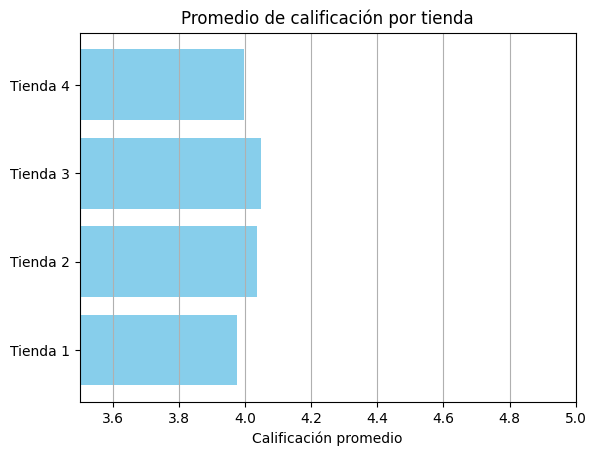

In [78]:
plt.barh(calificacion.columns, calificacion.loc['Calificación'], color='skyblue')
plt.title("Promedio de calificación por tienda")
plt.xlabel("Calificación promedio")
plt.xlim(3.5, 5)  # acorta el rango del eje para resaltar diferencias
plt.grid(True, axis='x')
plt.show()

El análisis de calificaciones promedio muestra que las cuatro tiendas mantienen niveles similares de satisfacción del cliente, con valores cercanos a 4.0 sobre 5.
Las **Tiendas 2 y 3** presentan los promedios más altos, lo que sugiere un servicio ligeramente mejor valorado.
La **Tienda 1**, aunque con la calificación más baja, se mantiene dentro de un rango positivo.

##Costo de envío promedio

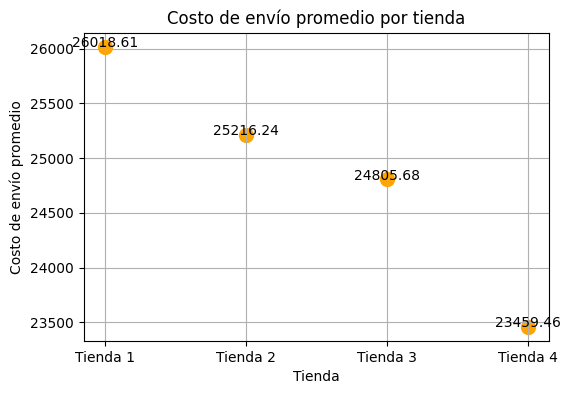

In [79]:
valores_costo_envio = costo_envio.loc['Costo de envío']
etiquetas_costo_envio = costo_envio.columns

plt.figure(figsize=(6,4))
plt.scatter(etiquetas_costo_envio, valores_costo_envio, color='orange', s=100)

plt.title("Costo de envío promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo de envío promedio")
plt.grid(True)

# Mostrar etiquetas de valor encima de los puntos
for i, v in enumerate(valores_costo_envio):
    plt.text(i, v + 0.2, f"{v:.2f}", ha='center')

plt.show()



El análisis del costo de envío promedio muestra que existe una ligera variación entre las tiendas.
La **Tienda 1** presenta el costo de envío más alto (≈26,000), mientras que la **Tienda 4** ofrece el más bajo (≈23,500).
Las Tiendas 2 y 3 se mantienen en valores intermedios, cercanos a 25,000.
Aunque las diferencias no son muy significativas, el hecho de que el cliente asuma el costo del envío puede hacer que las tiendas con costos menores, como la **Tienda 4**, resulten más competitivas y atractivas para el consumidor final

Tras analizar los indicadores de ingresos, calificaciones y costos de envío, se concluye que la **Tienda 4** representa la opción menos favorable para el Sr. Juan.
A pesar de tener el costo de envío más bajo, sus ingresos totales son los más reducidos, lo que indica un menor volumen de ventas.
Además, su calificación promedio no destaca respecto a las demás tiendas.
En conjunto, esto sugiere que vender en la Tienda 4 implicaría una menor exposición y menor oportunidad de venta para el Sr. Juan.